# 6.2.2 Συνδεσιμότητα Δικτύων Αναφορών Χρηστών

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
GG={}
import glob,os
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mention network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1

The number 1 cut mention network has 23868 nodes and 22304 edges
The number 2 cut mention network has 2358 nodes and 2278 edges
The number 3 cut mention network has 720 nodes and 613 edges
The number 4 cut mention network has 351 nodes and 261 edges
The number 5 cut mention network has 206 nodes and 131 edges
The number 6 cut mention network has 113 nodes and 74 edges
The number 7 cut mention network has 78 nodes and 49 edges
The number 8 cut mention network has 50 nodes and 30 edges
The number 9 cut mention network has 37 nodes and 22 edges
The number 10 cut mention network has 28 nodes and 15 edges
The number 11 cut mention network has 23 nodes and 12 edges
The number 12 cut mention network has 19 nodes and 10 edges
The number 13 cut mention network has 16 nodes and 8 edges
The number 14 cut mention network has 12 nodes and 6 edges
The number 15 cut mention network has 10 nodes and 5 edges
The number 16 cut mention network has 8 nodes and 4 edges
The number 17 cut mention network has

In [3]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [4]:
# lscc=[]
lsscc=[]
lswcc=[]
lsac=[]

for k,G in GG.items():
    lsscc.append(nx.number_strongly_connected_components(G))
    lswcc.append(nx.number_weakly_connected_components(G))
    lsac.append(nx.number_attracting_components(G))     
print lsscc,len(lsscc)
print lswcc,len(lswcc)
print lsac,len(lsac)

nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[23868, 2358, 720, 351, 206, 113, 78, 50, 19, 28, 23, 6, 16, 12, 10, 8, 4, 2, 37] 19
[3440, 429, 168, 100, 77, 41, 30, 20, 9, 13, 11, 3, 8, 6, 5, 4, 2, 1, 15] 19
[9275, 1103, 351, 178, 105, 55, 40, 25, 9, 13, 11, 3, 8, 6, 5, 4, 2, 1, 19] 19
['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_12', 'G_10', 'G_11', 'G_44', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [5]:
d1=zip(nGG,lsscc)
print d1
d2=zip(nGG,lswcc)
print d2
d3=zip(nGG,lsac)
print d3
d4=zip(nGG,lsscc,lswcc,lsac)
print d4


[('G_1', 23868), ('G_2', 2358), ('G_3', 720), ('G_4', 351), ('G_5', 206), ('G_6', 113), ('G_7', 78), ('G_8', 50), ('G_12', 19), ('G_10', 28), ('G_11', 23), ('G_44', 6), ('G_13', 16), ('G_14', 12), ('G_15', 10), ('G_16', 8), ('G_49', 4), ('G_50', 2), ('G_9', 37)]
[('G_1', 3440), ('G_2', 429), ('G_3', 168), ('G_4', 100), ('G_5', 77), ('G_6', 41), ('G_7', 30), ('G_8', 20), ('G_12', 9), ('G_10', 13), ('G_11', 11), ('G_44', 3), ('G_13', 8), ('G_14', 6), ('G_15', 5), ('G_16', 4), ('G_49', 2), ('G_50', 1), ('G_9', 15)]
[('G_1', 9275), ('G_2', 1103), ('G_3', 351), ('G_4', 178), ('G_5', 105), ('G_6', 55), ('G_7', 40), ('G_8', 25), ('G_12', 9), ('G_10', 13), ('G_11', 11), ('G_44', 3), ('G_13', 8), ('G_14', 6), ('G_15', 5), ('G_16', 4), ('G_49', 2), ('G_50', 1), ('G_9', 19)]
[('G_1', 23868, 3440, 9275), ('G_2', 2358, 429, 1103), ('G_3', 720, 168, 351), ('G_4', 351, 100, 178), ('G_5', 206, 77, 105), ('G_6', 113, 41, 55), ('G_7', 78, 30, 40), ('G_8', 50, 20, 25), ('G_12', 19, 9, 9), ('G_10', 28, 13

In [7]:
cdf1=pd.DataFrame(d4)
cdf1.columns = ['cut mention graph', 'number of strongly connected components','number of weakly connected components','number of attracting components']
cdf1 = cdf1.sort('number of strongly connected components', ascending=False)
cdf1

,cut mention graph,number of strongly connected components,number of weakly connected components,number of attracting components
0,G_1,23868,3440,9275
1,G_2,2358,429,1103
2,G_3,720,168,351
3,G_4,351,100,178
4,G_5,206,77,105
5,G_6,113,41,55
6,G_7,78,30,40
7,G_8,50,20,25
18,G_9,37,15,19
9,G_10,28,13,13


In [8]:
# cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_2")
cdf1.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_2")

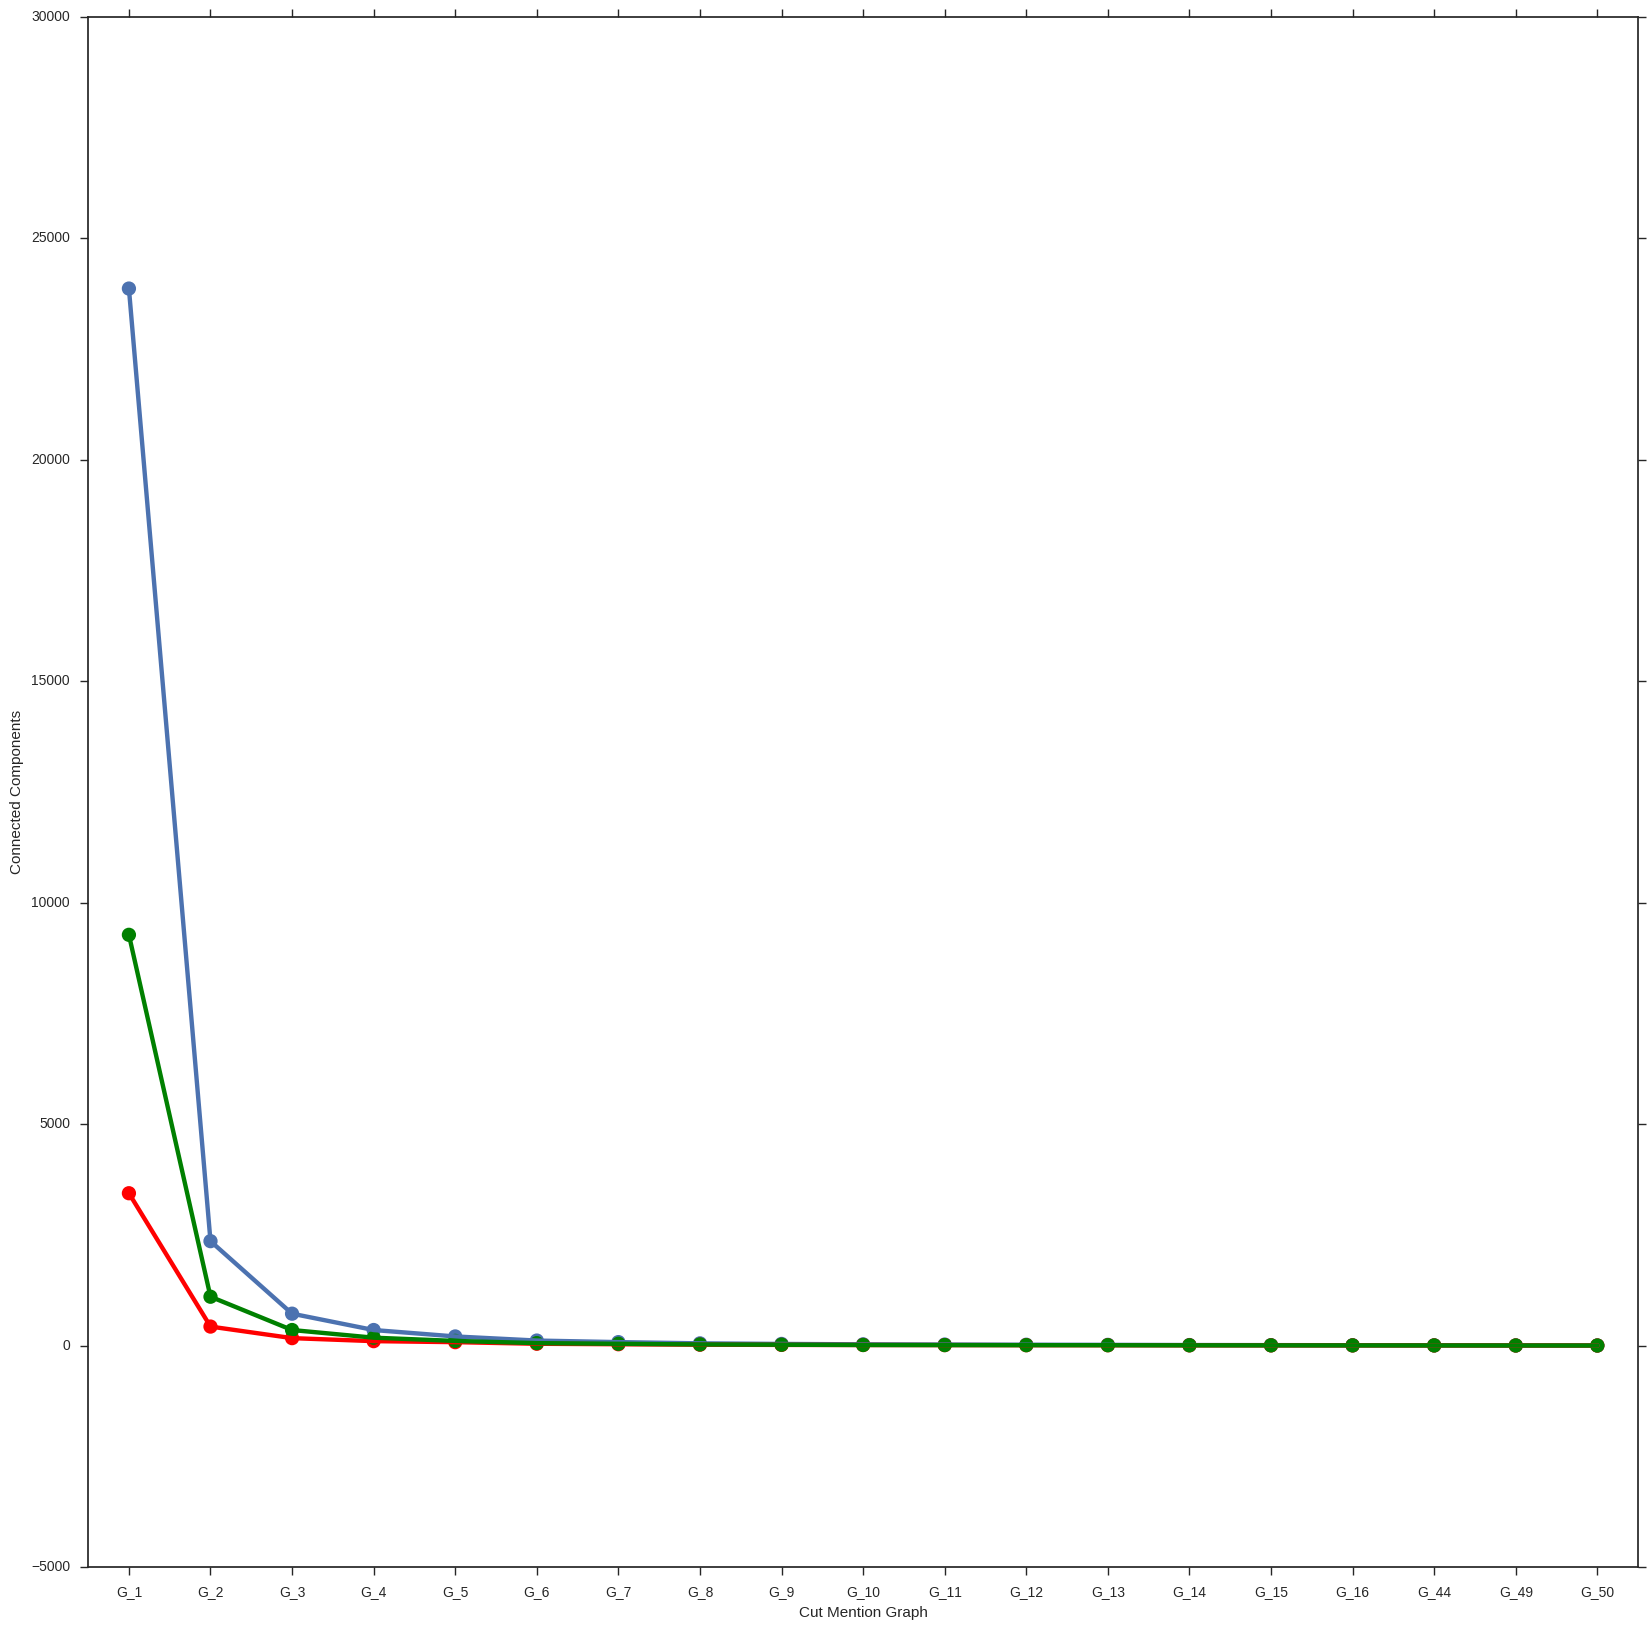

In [9]:
x = cdf1["cut mention graph"]
y1 = cdf1["number of strongly connected components"]
y2 = cdf1["number of weakly connected components"]
y3 = cdf1["number of attracting components"]

plt.figure(figsize=(20,20))

ax1=sns.pointplot(x, y1)
ax2=sns.pointplot(x, y2,color='red')
ax3=sns.pointplot(x, y3,color='green')

a1=ax1.set(xlabel='Cut Mention Graph',ylabel='Connected Components')


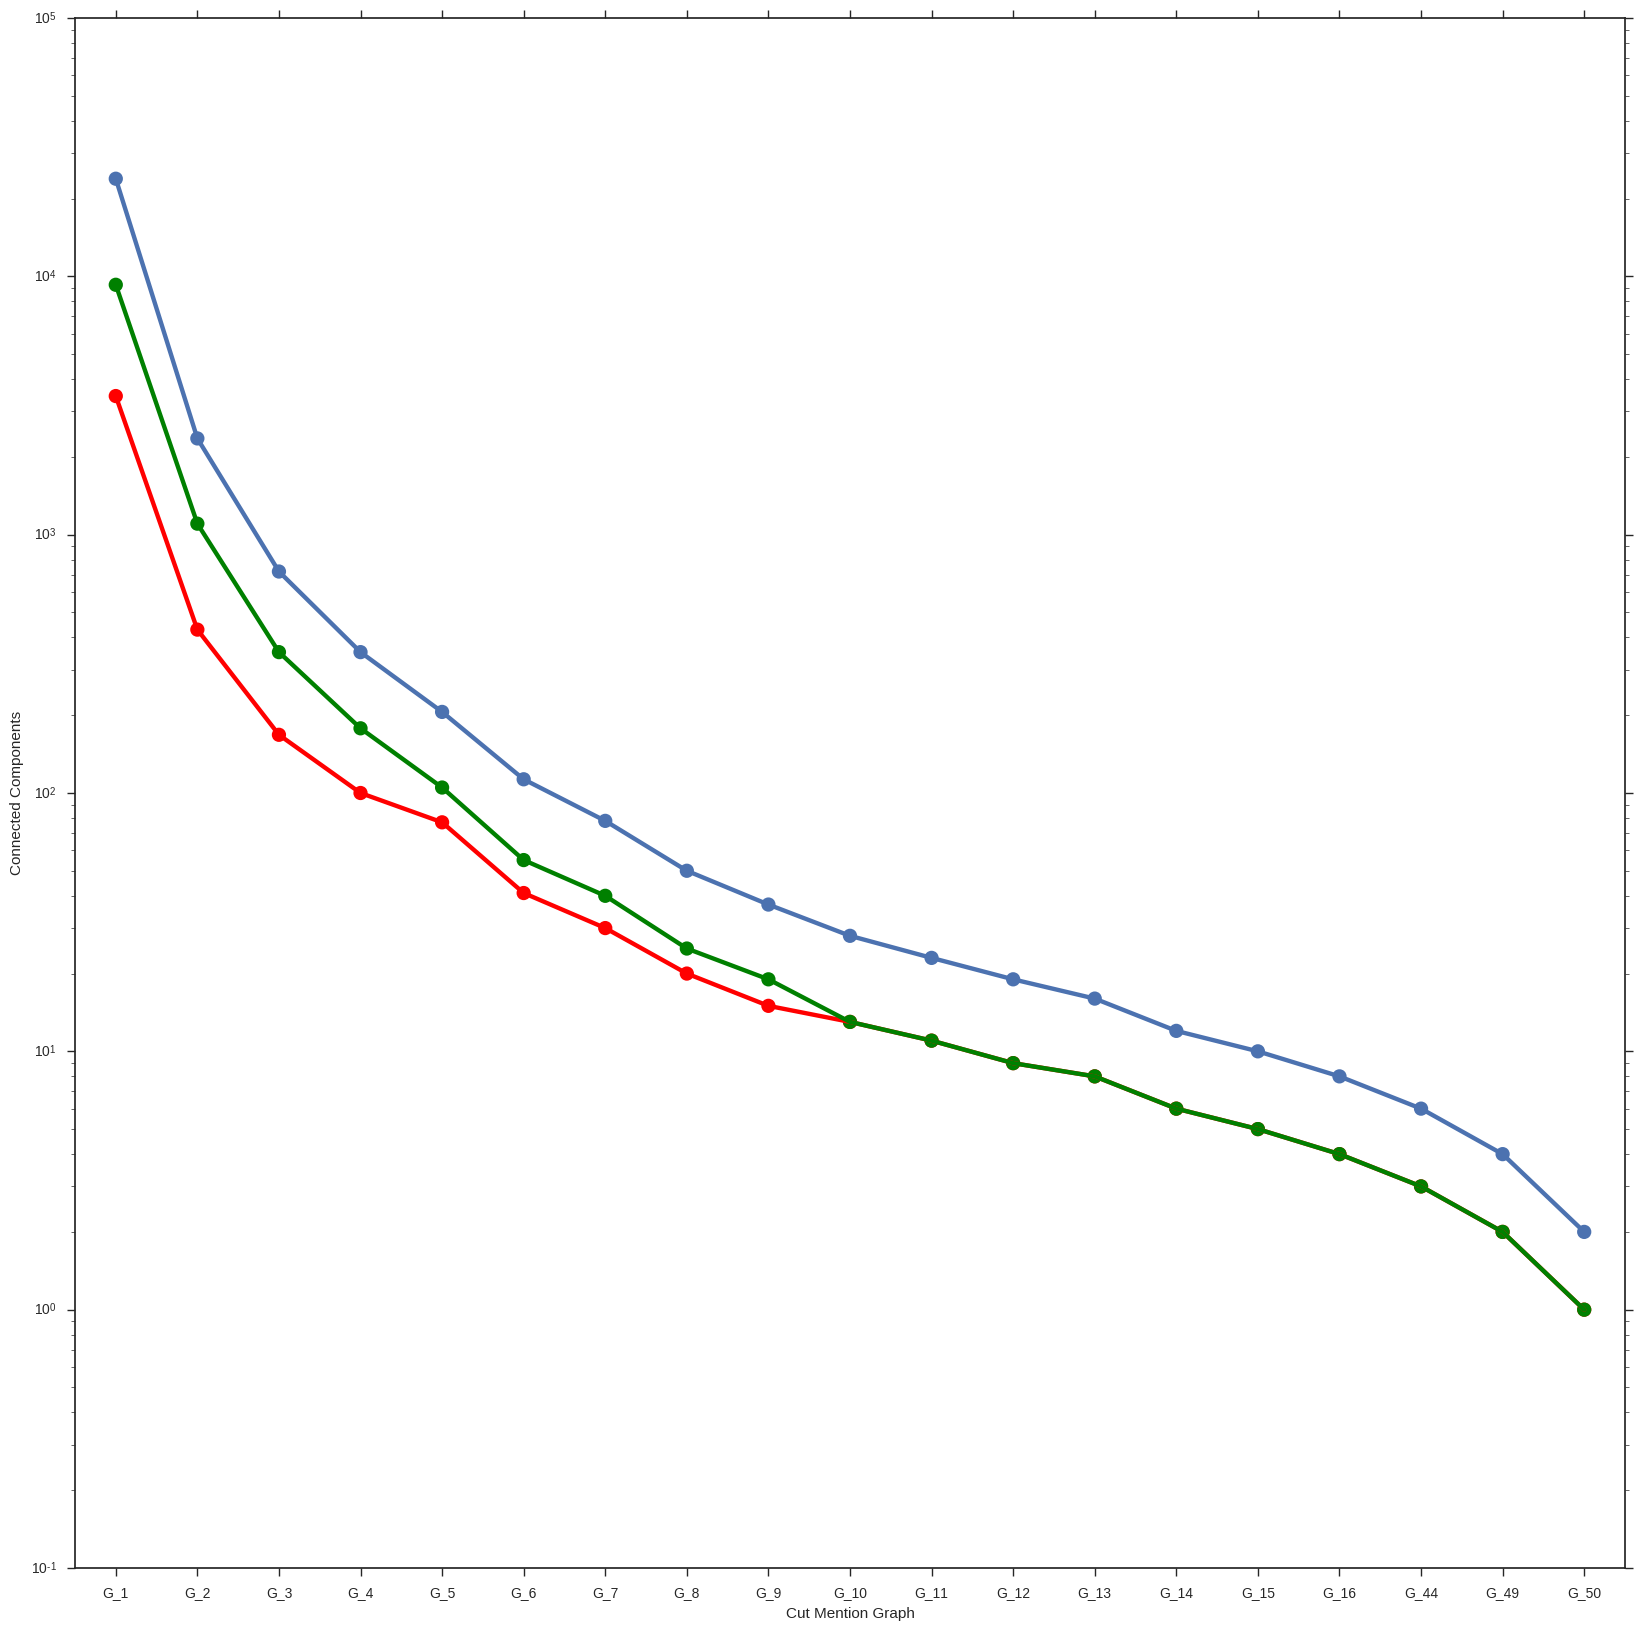

In [10]:
x = cdf1["cut mention graph"]
y1 = cdf1["number of strongly connected components"]
y2 = cdf1["number of weakly connected components"]
y3 = cdf1["number of attracting components"]

plt.figure(figsize=(20,20))


ax1=sns.pointplot(x, y1)
a1=ax1.set(yscale='log')
ax2=sns.pointplot(x, y2,color='red')
a2=ax2.set(yscale='log')
ax3=sns.pointplot(x, y3,color='green')
a3=ax3.set(yscale='log')
a4=ax1.set(xlabel='Cut Mention Graph',ylabel='Connected Components')


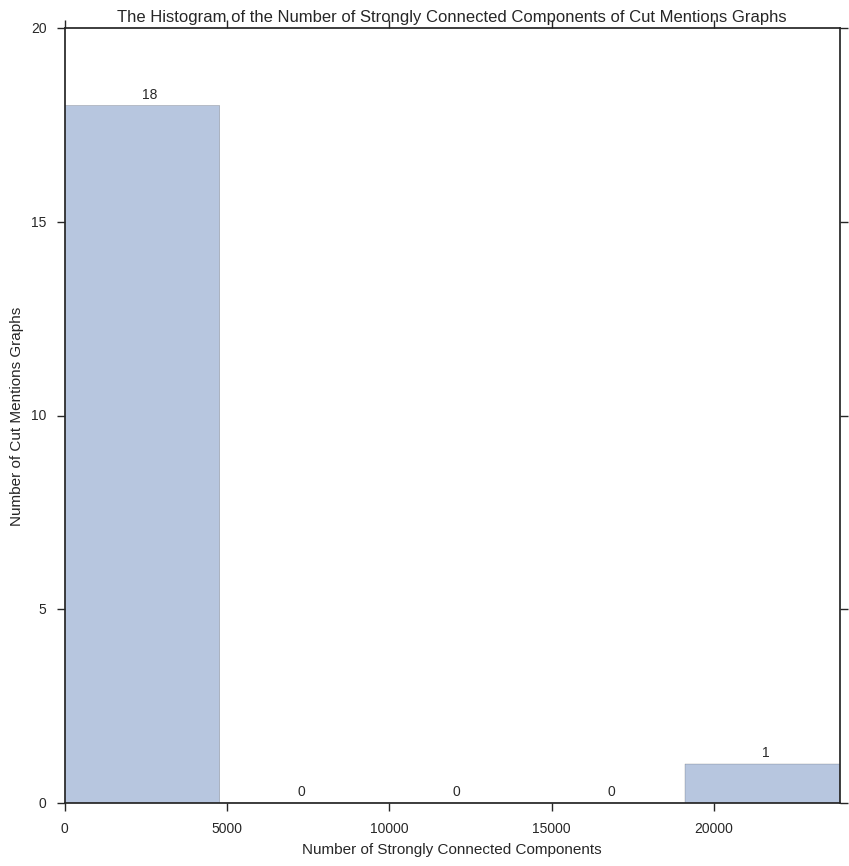

In [11]:
plt.figure(figsize=(10,10))
bins=5
ax=sns.distplot(cdf1['number of strongly connected components'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Mentions Graphs')
plt.xlabel('Number of Strongly Connected Components')
tt='The Histogram of the Number of Strongly Connected Components of Cut Mentions Graphs' 
# ax = sns.distplot(x="class", hue="who", data=titanic)
total = float(len(cdf1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lsscc)/float(bins))/2)-2), height+0.2, '%i'%(height))#/total))
plt.title(tt)
a3=ax.set(ylim=(0,20))
a4=ax.set(xlim=(0,max(lsscc)))
warnings.filterwarnings("ignore")

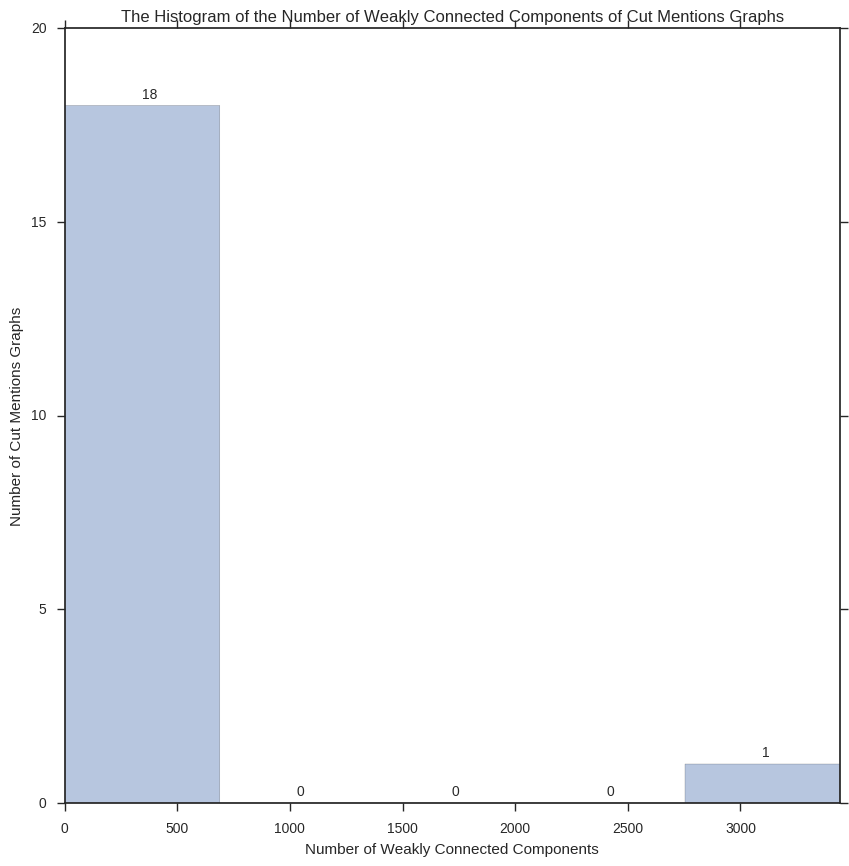

In [12]:
plt.figure(figsize=(10,10))
bins=5
ax=sns.distplot(cdf1['number of weakly connected components'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Mentions Graphs')
plt.xlabel('Number of Weakly Connected Components')
tt='The Histogram of the Number of Weakly Connected Components of Cut Mentions Graphs' 
# ax = sns.distplot(x="class", hue="who", data=titanic)
total = float(len(cdf1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lswcc)/float(bins))/2)-2), height+0.2, '%i'%(height))#/total))
plt.title(tt)
a3=ax.set(ylim=(0,20))
a4=ax.set(xlim=(0,max(lswcc)))
warnings.filterwarnings("ignore")

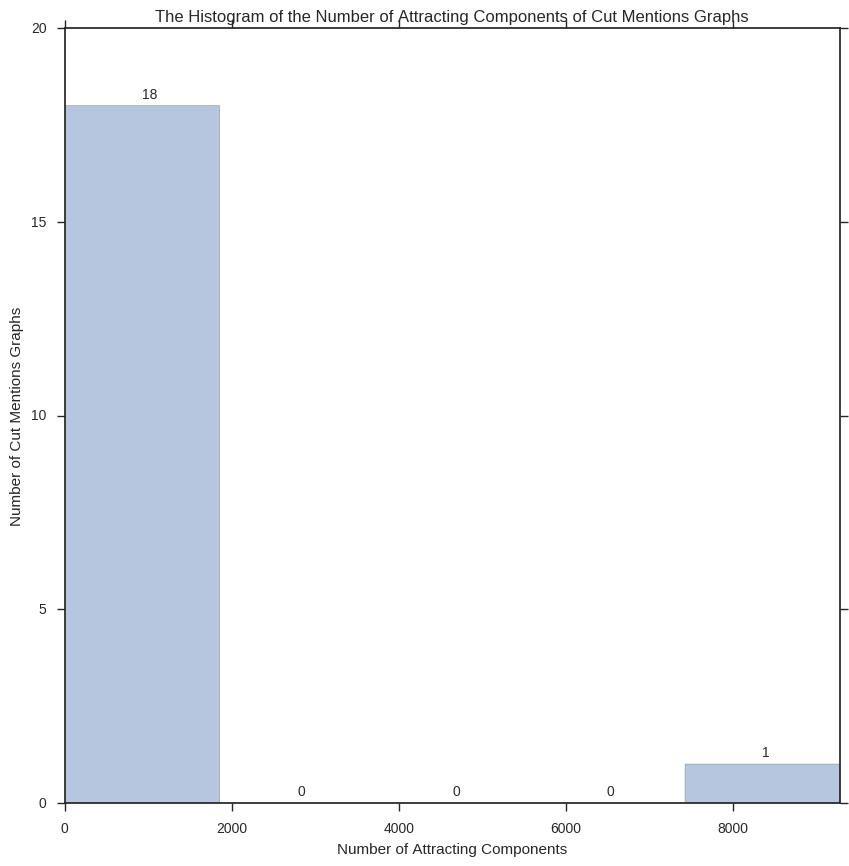

In [13]:
plt.figure(figsize=(10,10))
bins=5
ax=sns.distplot(cdf1['number of attracting components'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Mentions Graphs')
plt.xlabel('Number of Attracting Components')
tt='The Histogram of the Number of Attracting Components of Cut Mentions Graphs' 
# ax = sns.distplot(x="class", hue="who", data=titanic)
total = float(len(cdf1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lsac)/float(bins))/2)-2), height+0.2, '%i'%(height))#/total))
plt.title(tt)
a3=ax.set(ylim=(0,20))
a4=ax.set(xlim=(0,max(lsac)))
warnings.filterwarnings("ignore")